In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

Seaborn là libary visualize data phong phú và phức tạp do đó sẽ được chia ra các loại plot chứ không xắp xếp cơ bản theo matplotlib.

Tuy nhiên một vài function của matplotlib cũng sử dụng được trong seaborn do seaborn là một phiên bản phong phú, phức tạp và thể hiện thông tin chi tiết hơn của matplotlib.

#  Matrix Plots

Matrix plots cho phép bạn vẽ biểu đồ dữ liệu dưới dạng ma trận được mã hóa màu (color-encoded matrices) và cũng có thể được sử dụng để chỉ ra các cụm trong dữ liệu (clusters )

* heatmap
* clutermap

In [3]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [5]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# I) heatmap

* Để heatmap hoạt động bình thường, dữ liệu của bạn phải ở dạng ma trận (matrix form)


## 1) heatmap correlation



## Thông số của:

heatmap(
  
    tips.corr(), : dữ liệu matrix
    cmap='coolwarm', : corlour map
    annot=True, : annotate để chữ số lên heatmap
    fmt=".2f", : format của annotate là 1 f-string để cho bao nhêu số sau phẩy và tắt chức năng ký hiệu khoa học (scientific notation)
    annot_kws={'fontsize':16} : annotate keywords cho chỉnh sửa properties dưới dạng dictionary
    
)

In [7]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


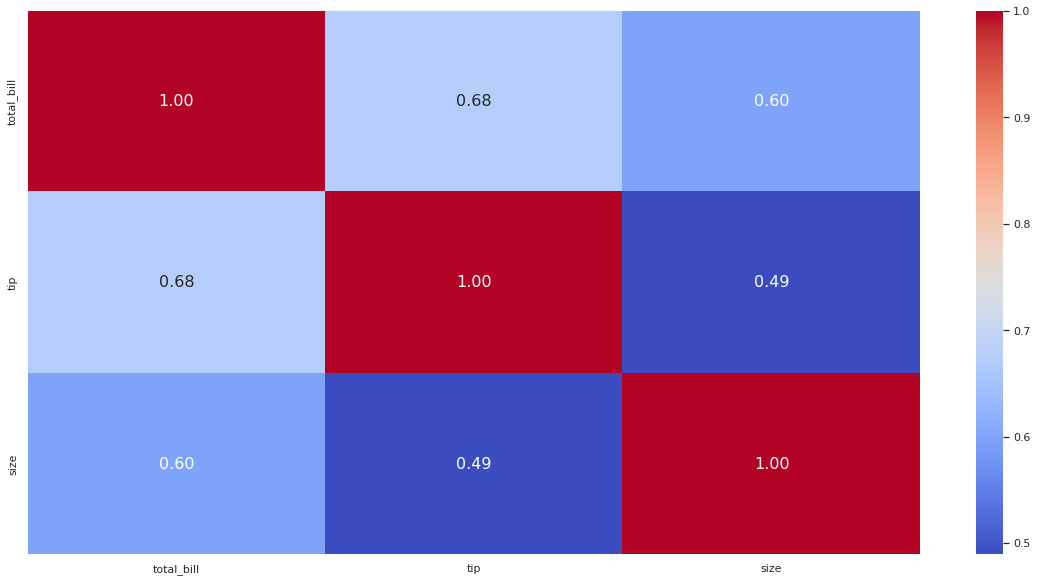

In [15]:
sns.set(rc = {'figure.figsize':(20,10)});

sns.heatmap(tips.corr(),
            cmap='coolwarm',
            annot=True,
            fmt=".2f",
            annot_kws={'fontsize':16})


## 2) heatmap data matrix

## Thông số của:

heatmap(
  
    pvflights, : dữ liệu matrix
    linewidths=1, : độ rộng line ngăn cách 
    square = True : tạo ra một hình vuông cho mỗi ô màu
    
)

In [9]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


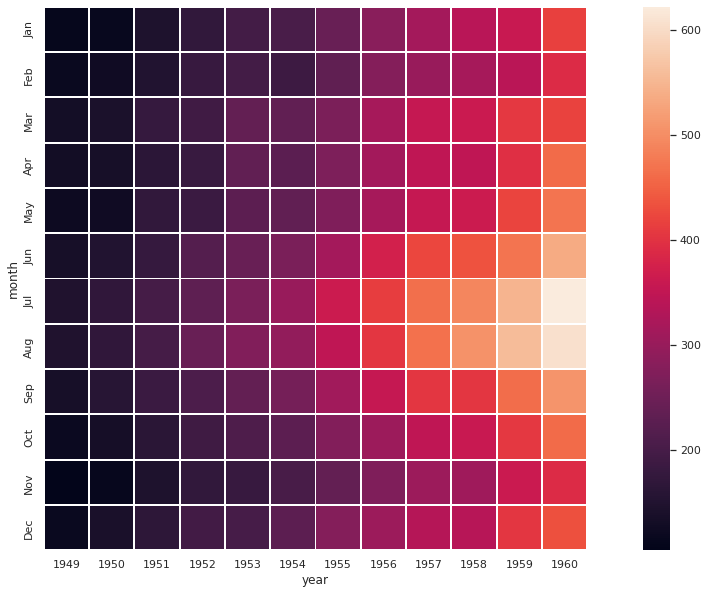

In [10]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')

sns.heatmap(pvflights, 
            linewidths=1, 
            square = True);


# II) clustermap

* Clustermap sử dụng phân cụm phân cấp (hierarchal clustering) để tạo ra một phiên bản nhóm (clustered version) của heatmap

* Với cụm phân cấp (hierarchal clustering), em có thể biết điểm nào gần nhau hơn bởi độ cao của hierarchal cluster

## Thông số của:

heatmap(
  
    pvflights, : dữ liệu matrix
    cmap='coolwarm', : corlour map
    annot=True, : annotate để chữ số lên heatmap
    standard_scale=1, : cho phép scale: 0 sẽ là hàng, 1 sẽ là cột để so sánh dễ hơn
    linewidths=1, : độ rộng line ngăn cách 
    square = True : tạo ra một hình vuông cho mỗi ô màu
    
)

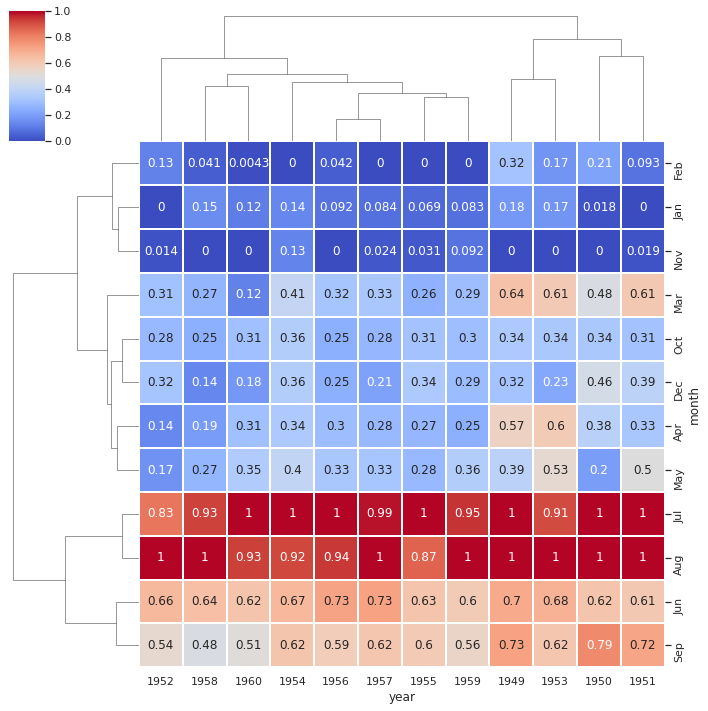

In [14]:
sns.clustermap(pvflights,
               cmap='coolwarm',
               annot=True,
               standard_scale=1,
               linewidths=1, 
               square = True);